# Logistic Regression Assignment

## 1. Data Exploration


1. DATA EXPLORATION

a. Dataset Information:
----------------------------------------
Shape of dataset: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

b. Features and Summary Statistics:
----------------------------------------

Column Names and Data Types:
Pregnancies                   int64
Glucose                       i

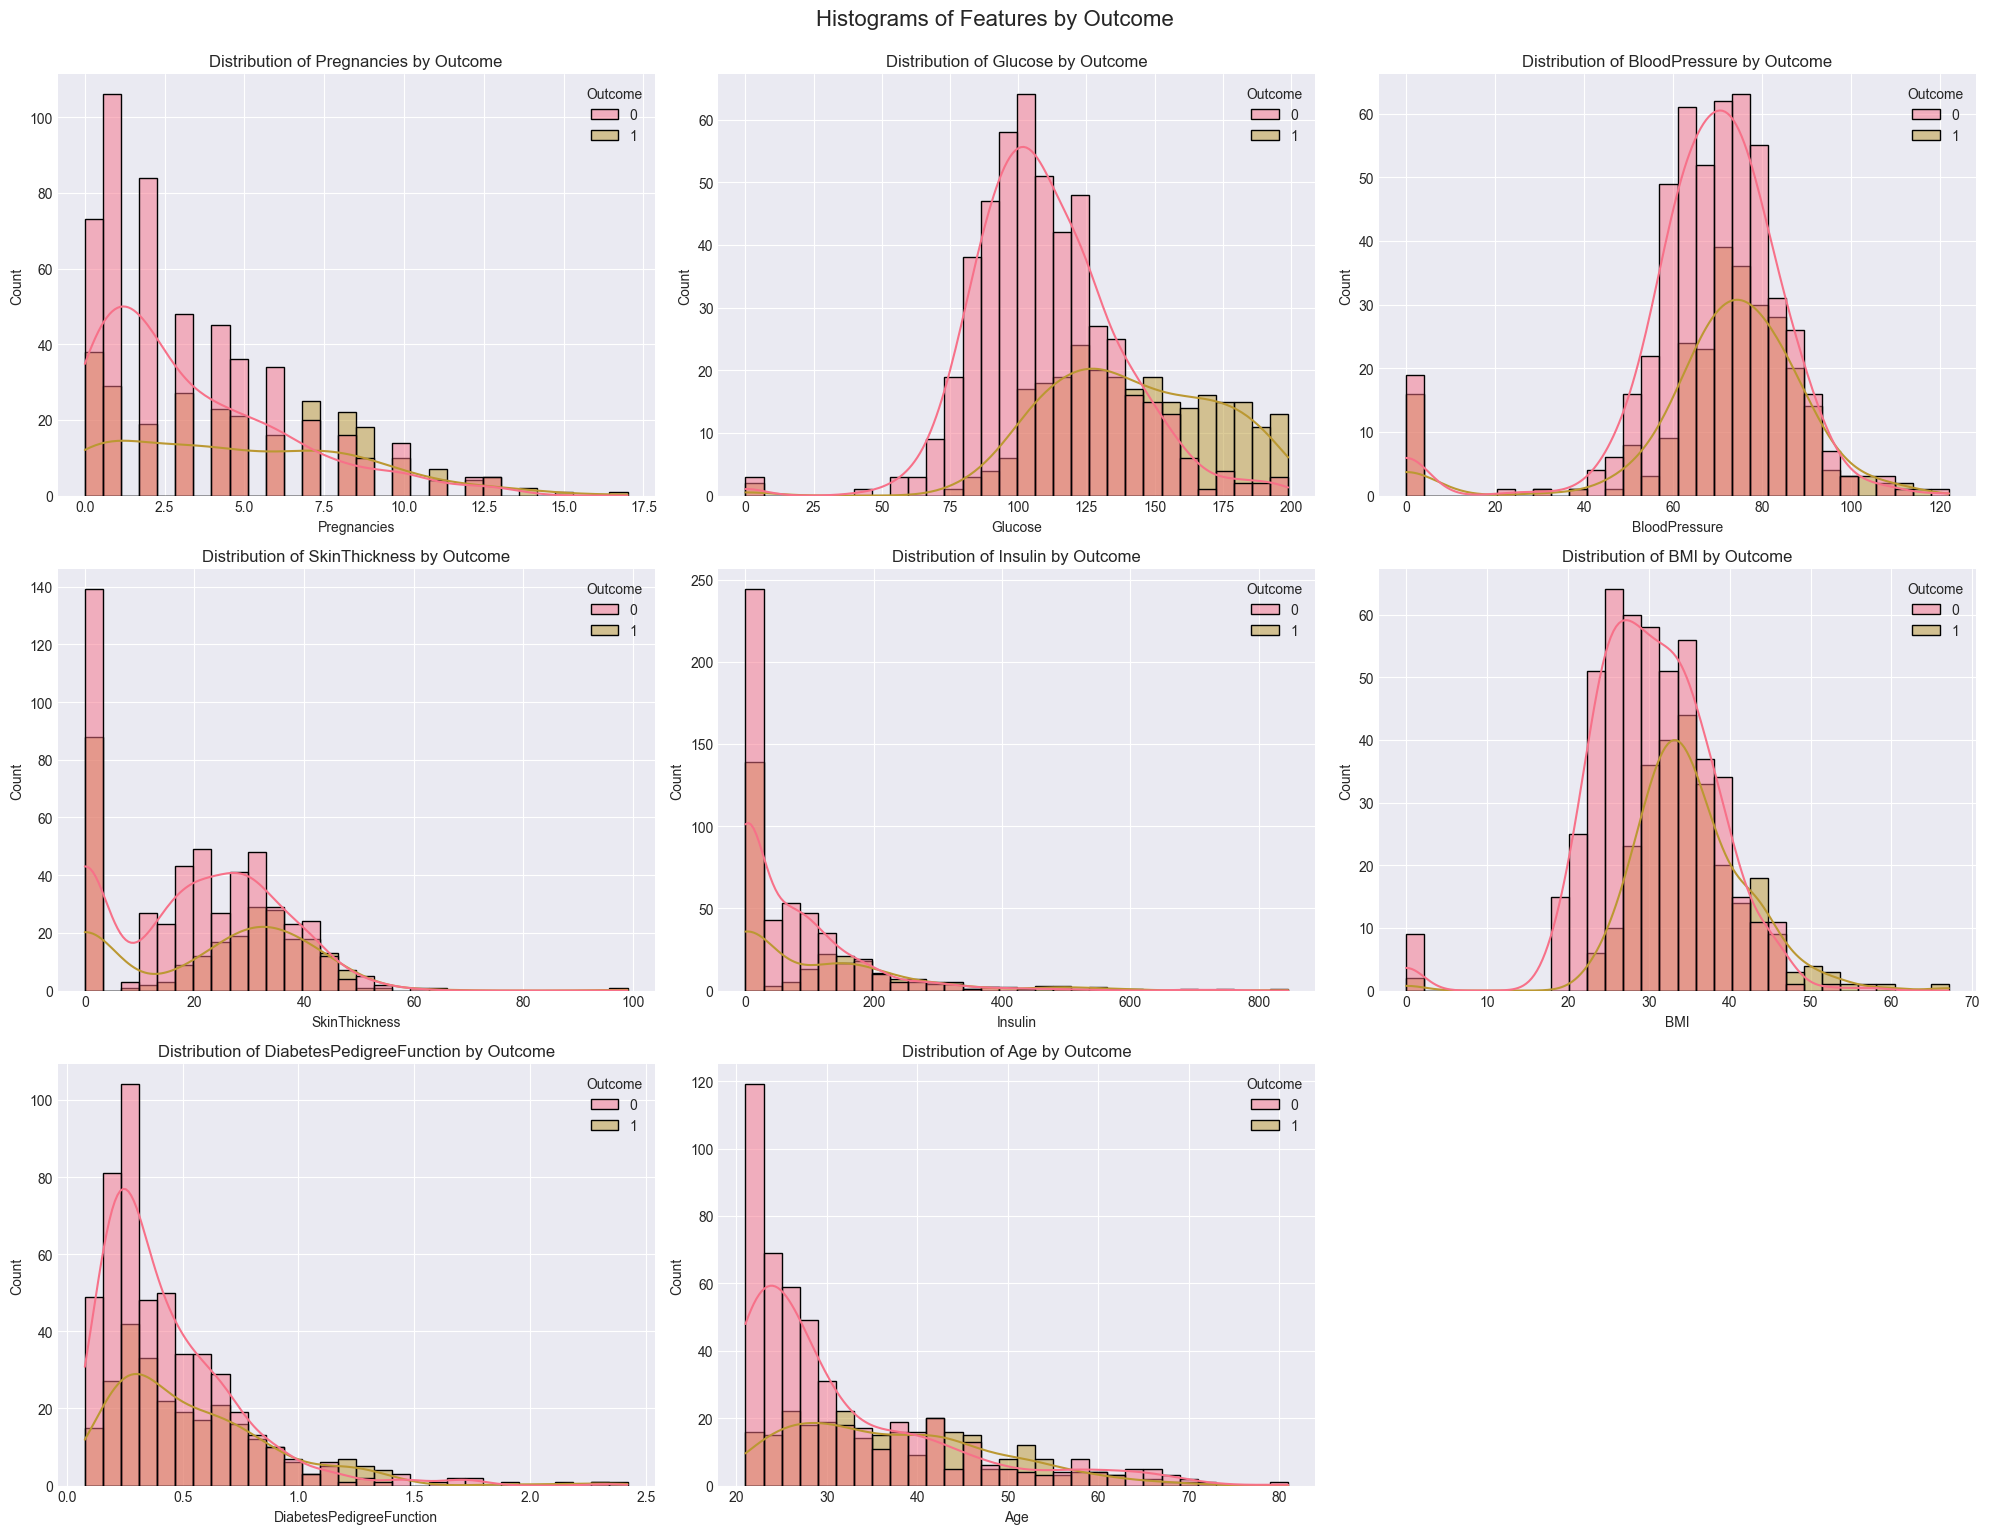

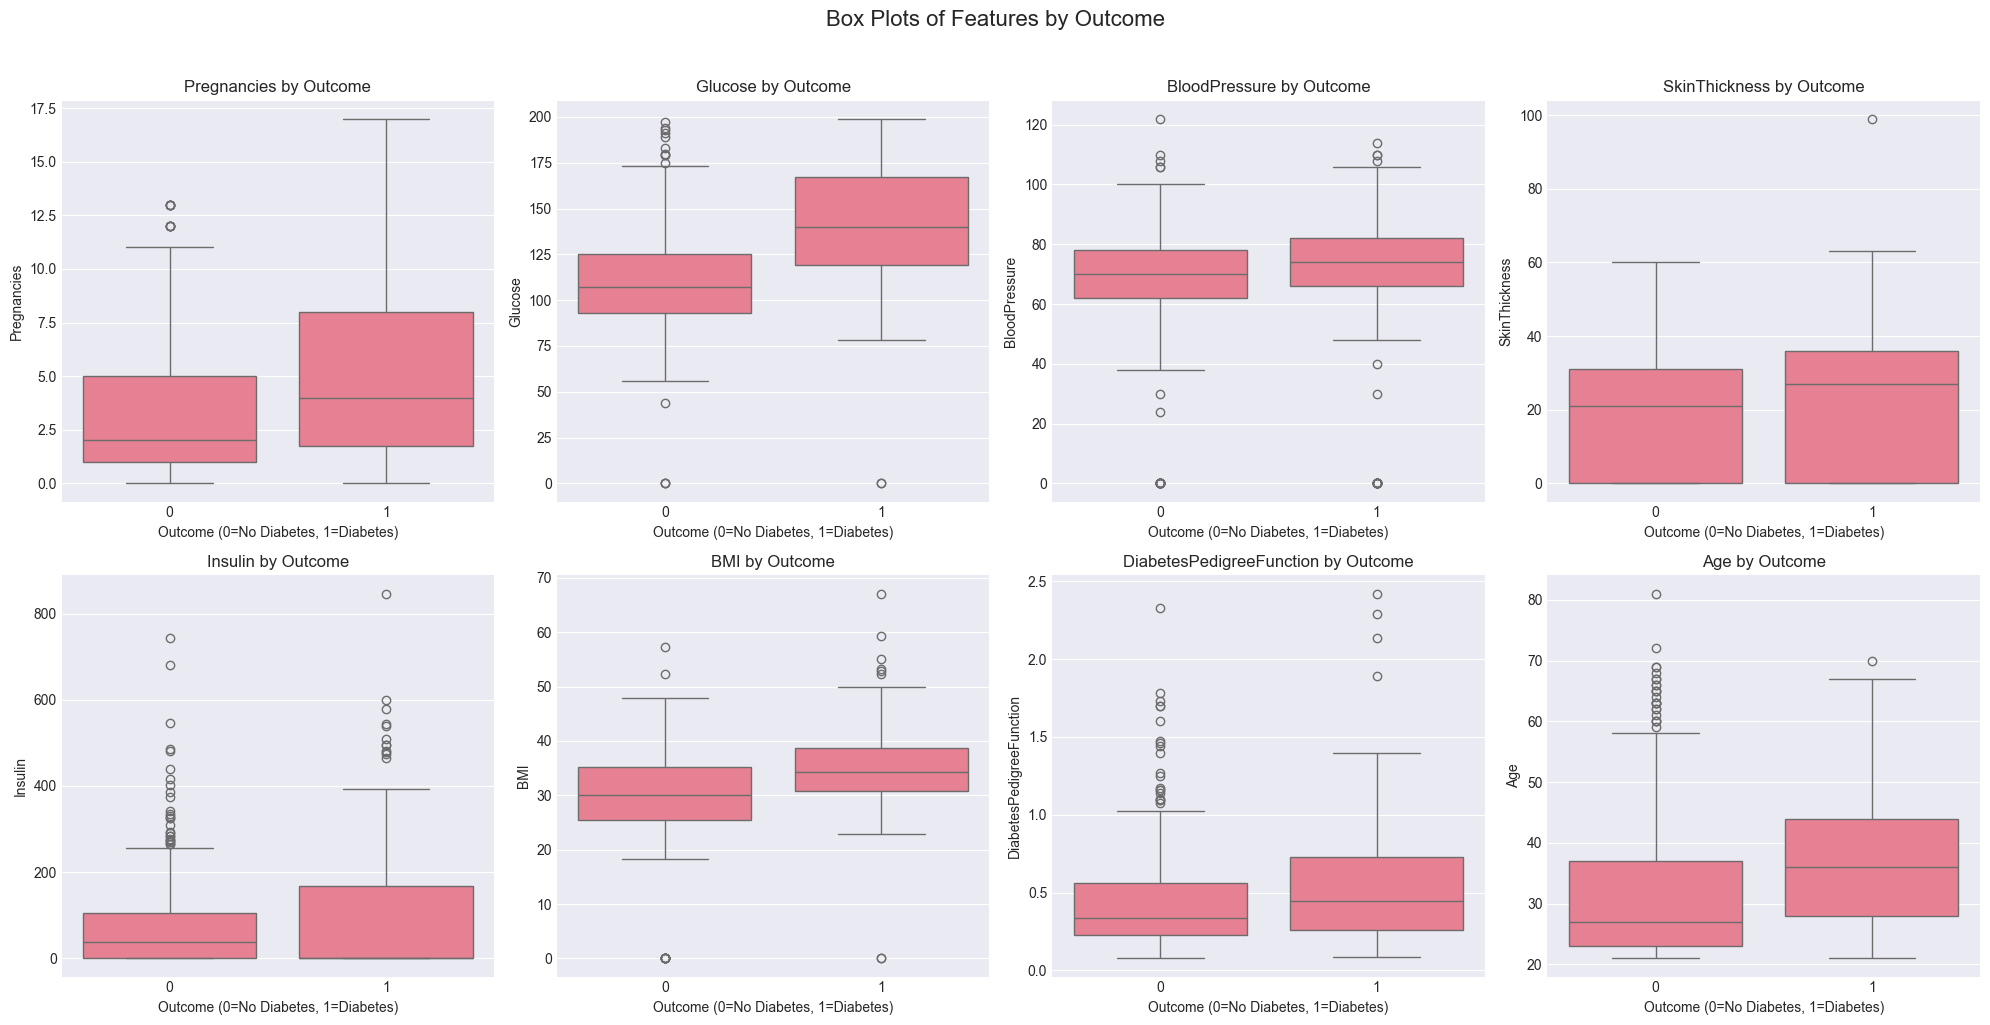

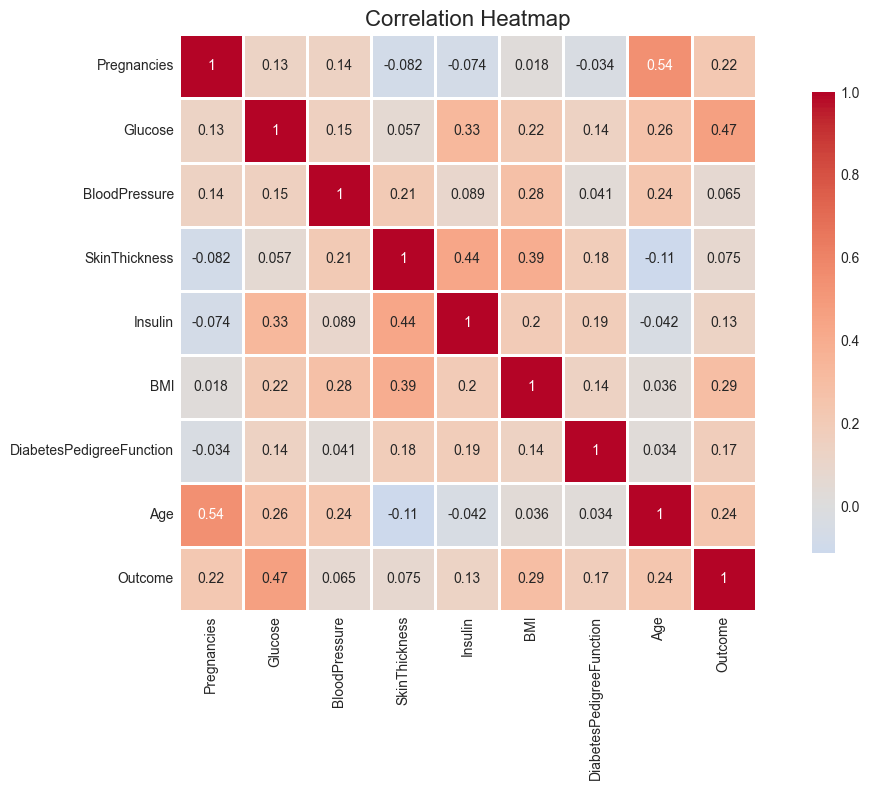

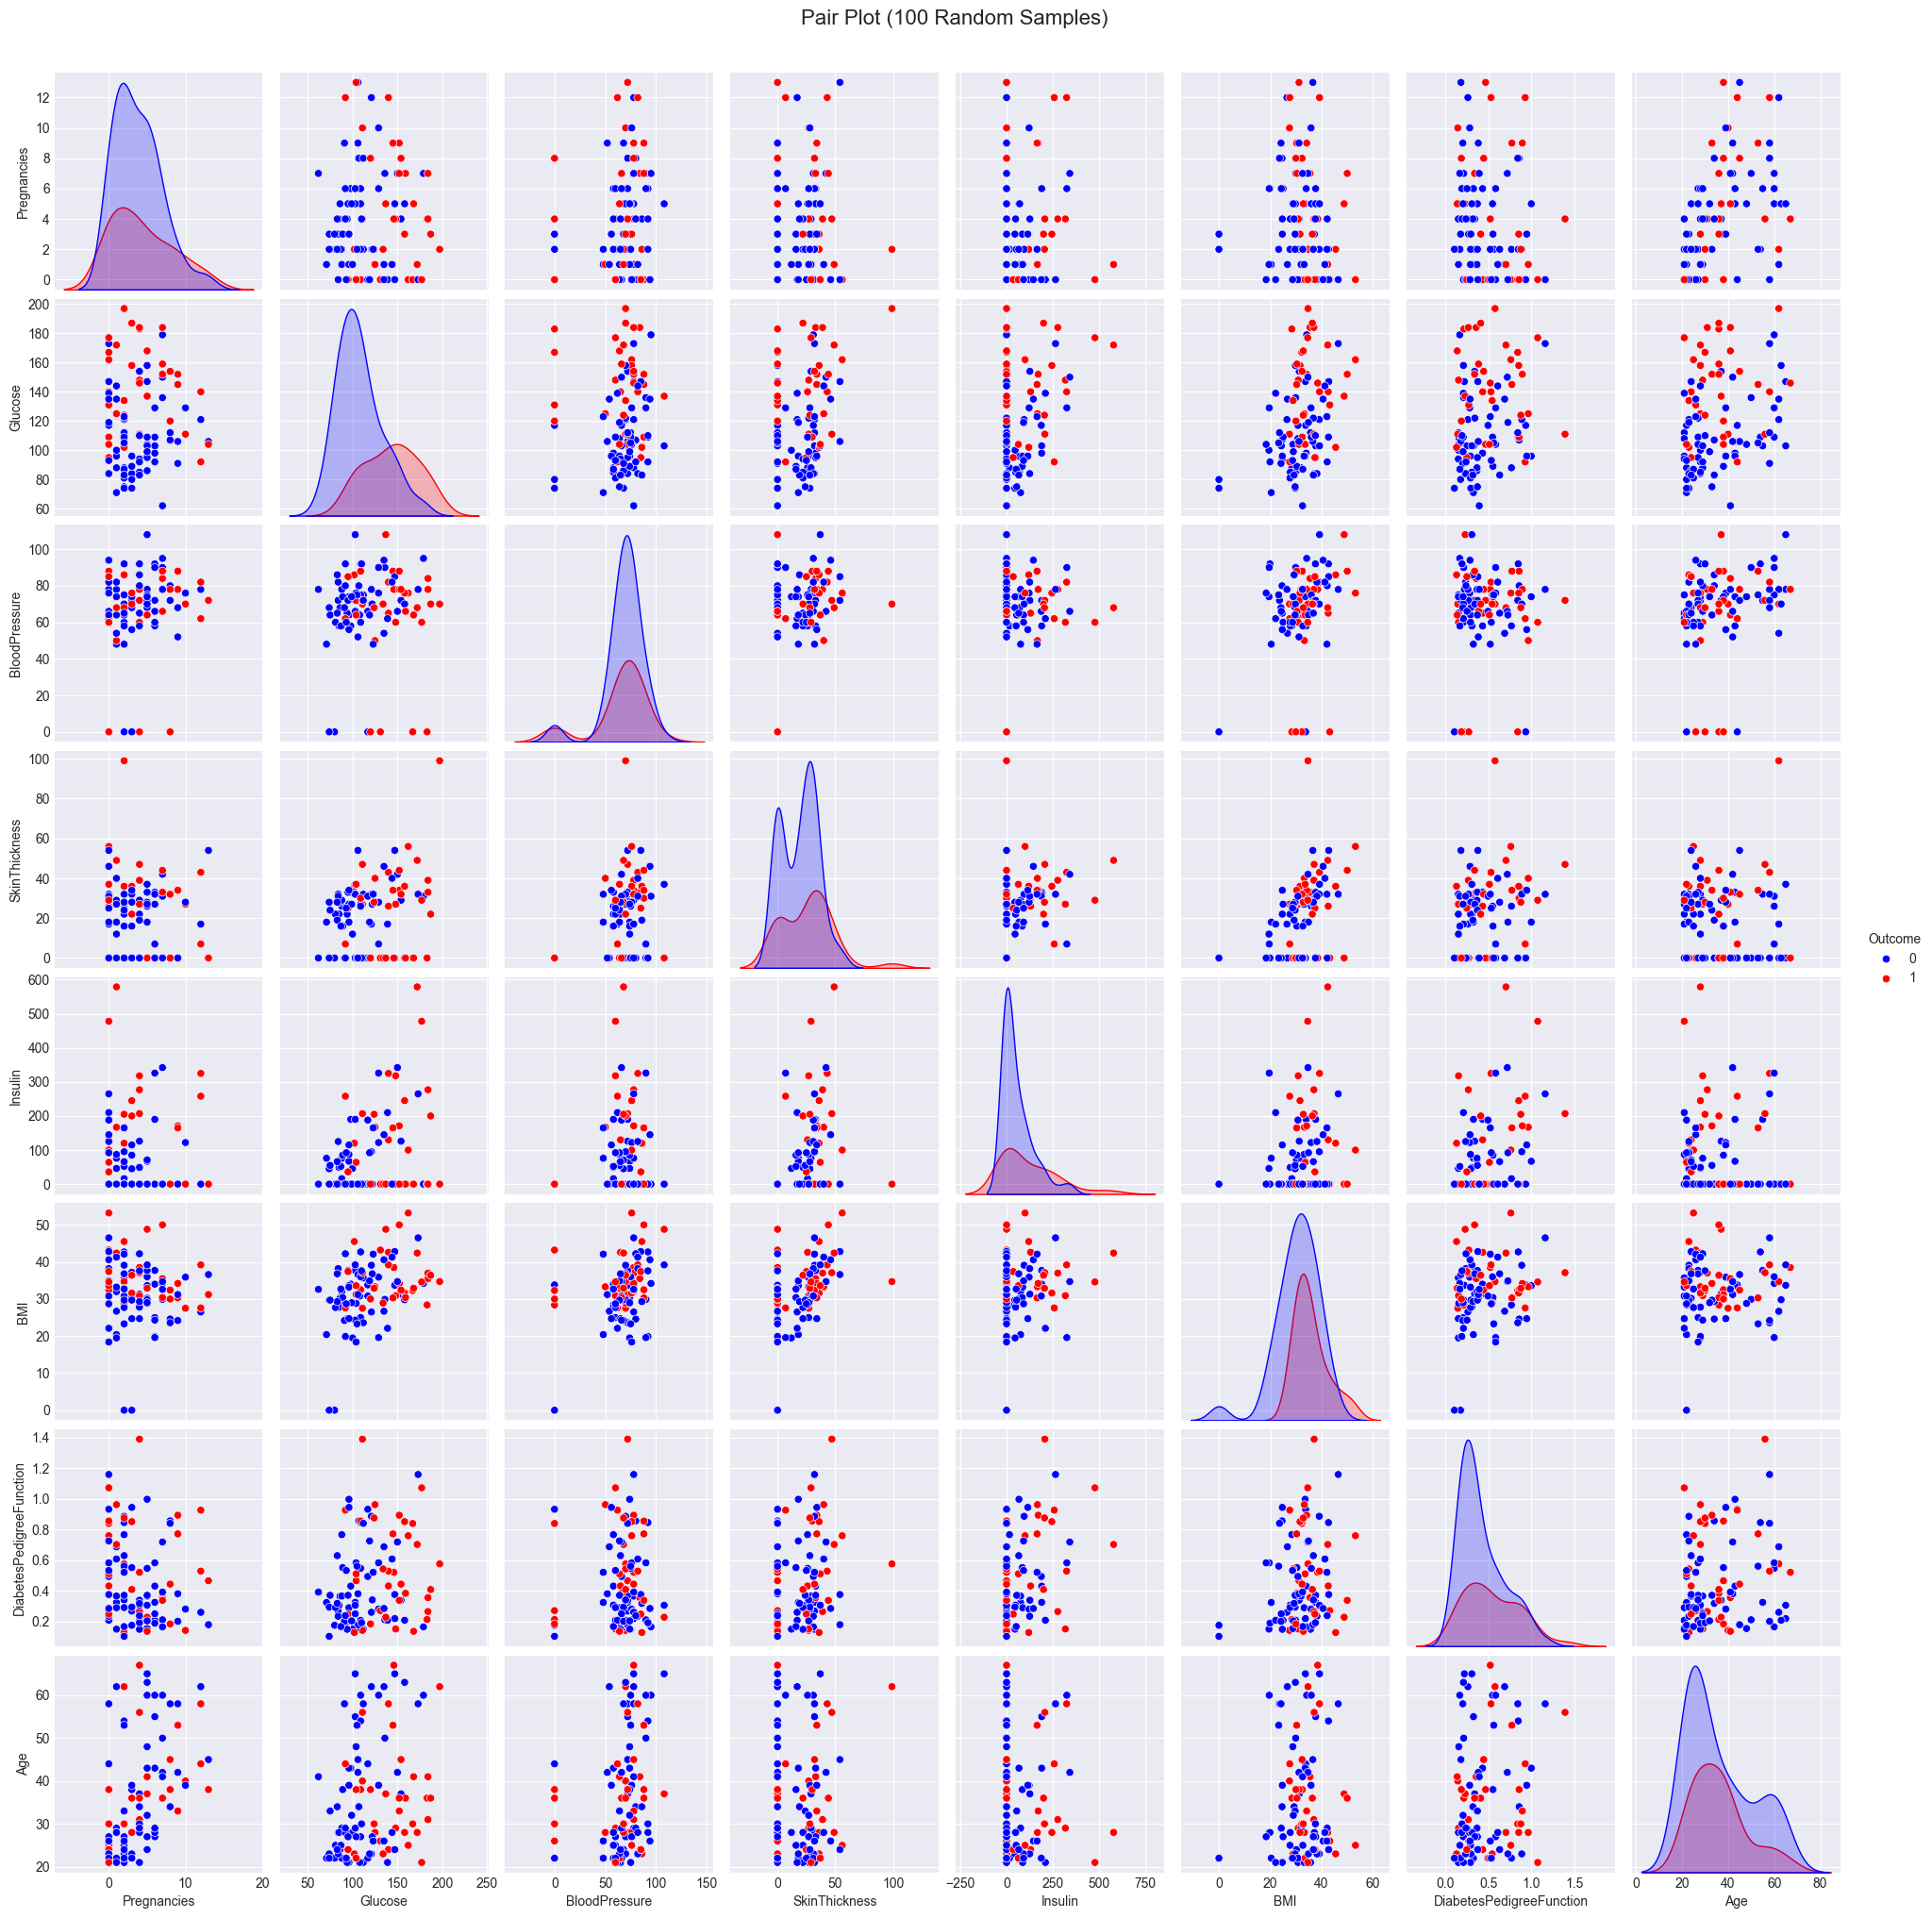


Analysis of Patterns and Correlations:
----------------------------------------

Observations:
1. Glucose levels are strongly correlated with diabetes outcome
2. BMI and Age also show positive correlation with diabetes
3. Some features like BloodPressure and SkinThickness show weaker correlations
4. There are 0 values in some features (Glucose, BloodPressure, etc.) that might represent missing values
5. The dataset shows class imbalance (more non-diabetic cases)


2. DATA PREPROCESSING

a. Handling Missing Values:
----------------------------------------
Missing values after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Imputed Glucose with median: 117.00
Imputed BloodPressure with median: 72.00
Imputed SkinT

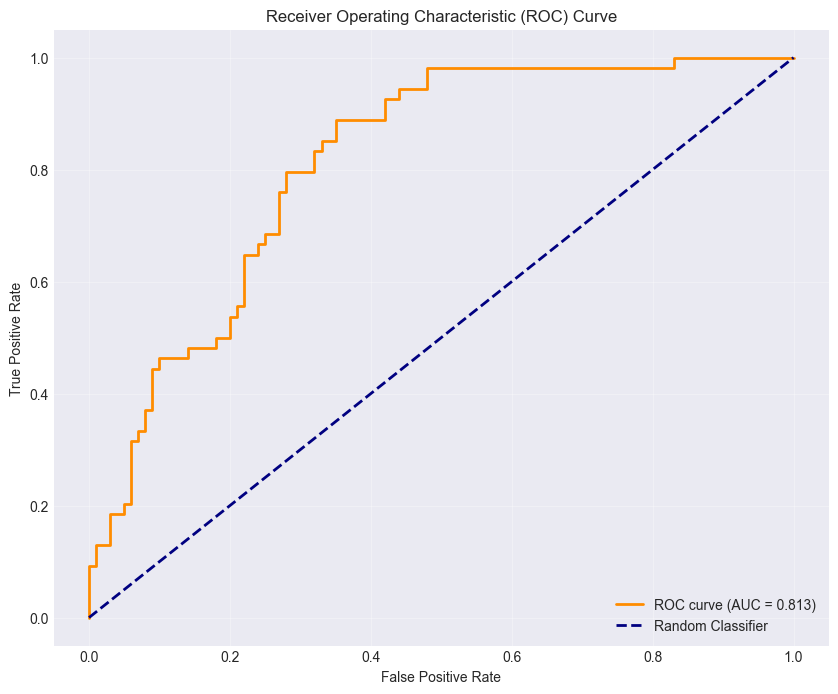


5. INTERPRETATION

a. Coefficient Interpretation:
----------------------------------------

Feature Coefficients (sorted by absolute value):
                 Feature  Coefficient  Abs_Coefficient
                 Glucose     1.180614         1.180614
                     BMI     0.687247         0.687247
             Pregnancies     0.376536         0.376536
DiabetesPedigreeFunction     0.233195         0.233195
                     Age     0.147300         0.147300
                 Insulin    -0.066171         0.066171
           BloodPressure    -0.043986         0.043986
           SkinThickness     0.027302         0.027302


b. Feature Significance Discussion:
----------------------------------------

1. Glucose: Has the highest positive coefficient, indicating it's the most 
   significant predictor of diabetes. Higher glucose levels strongly increase 
   the probability of diabetes.

2. BMI: Second most important feature. Higher BMI increases diabetes risk, 
   which aligns wit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

df = pd.read_csv(r'C:\Users\Admin\Documents\EXCELR\DS Assignments\@\diabetes.csv')

print("=" * 60)
print("1. DATA EXPLORATION")
print("=" * 60)

print("\na. Dataset Information:")
print("-" * 40)
print(f"Shape of dataset: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

print("\nb. Features and Summary Statistics:")
print("-" * 40)
print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nc. Visualizations:")
print("-" * 40)

fig = plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Outcome')
    plt.xlabel(col)
    plt.tight_layout()

plt.suptitle('Histograms of Features by Outcome', fontsize=16, y=1.02)
plt.savefig('histograms.png', bbox_inches='tight', dpi=100)
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, x='Outcome', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Outcome')
    axes[i].set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
    axes[i].set_ylabel(col)

plt.suptitle('Box Plots of Features by Outcome', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('boxplots.png', bbox_inches='tight', dpi=100)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', bbox_inches='tight', dpi=100)
plt.show()

sample_df = df.sample(n=100, random_state=42)
sns.pairplot(sample_df, hue='Outcome', diag_kind='kde', 
             palette={0: 'blue', 1: 'red'})
plt.suptitle('Pair Plot (100 Random Samples)', fontsize=16, y=1.02)
plt.savefig('pairplot.png', bbox_inches='tight', dpi=100)
plt.show()

print("\nAnalysis of Patterns and Correlations:")
print("-" * 40)
print("""
Observations:
1. Glucose levels are strongly correlated with diabetes outcome
2. BMI and Age also show positive correlation with diabetes
3. Some features like BloodPressure and SkinThickness show weaker correlations
4. There are 0 values in some features (Glucose, BloodPressure, etc.) that might represent missing values
5. The dataset shows class imbalance (more non-diabetic cases)
""")

print("\n" + "=" * 60)
print("2. DATA PREPROCESSING")
print("=" * 60)

df_processed = df.copy()

print("\na. Handling Missing Values:")
print("-" * 40)

columns_with_potential_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 
                                'Insulin', 'BMI']

for col in columns_with_potential_zeros:
    df_processed[col] = df_processed[col].replace(0, np.nan)

print("Missing values after replacing zeros with NaN:")
print(df_processed.isnull().sum())

for col in df_processed.columns[:-1]:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"Imputed {col} with median: {median_val:.2f}")

print("\nMissing values after imputation:")
print(df_processed.isnull().sum())

print("\nb. Encoding Categorical Variables:")
print("-" * 40)
print("No categorical variables to encode in this dataset.")

print("\n" + "=" * 60)
print("3. MODEL BUILDING")
print("=" * 60)

X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\na. Building Logistic Regression Model:")
print("-" * 40)

model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear'
)

model.fit(X_train_scaled, y_train)

print("Model training completed!")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

print("\n" + "=" * 60)
print("4. MODEL EVALUATION")
print("=" * 60)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Metrics on Test Data:")
print("-" * 40)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('roc_curve.png', bbox_inches='tight', dpi=100)
plt.show()

print("\n" + "=" * 60)
print("5. INTERPRETATION")
print("=" * 60)

print("\na. Coefficient Interpretation:")
print("-" * 40)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
})

coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Coefficients (sorted by absolute value):")
print(coefficients.to_string(index=False))

print("\n" + "=" * 60)
print("\nb. Feature Significance Discussion:")
print("-" * 40)
print("""
1. Glucose: Has the highest positive coefficient, indicating it's the most 
   significant predictor of diabetes. Higher glucose levels strongly increase 
   the probability of diabetes.

2. BMI: Second most important feature. Higher BMI increases diabetes risk, 
   which aligns with medical knowledge about obesity and diabetes.

3. DiabetesPedigreeFunction: This genetic score has a moderate positive 
   coefficient, suggesting family history contributes to diabetes risk.

4. Age: Positive coefficient indicates that older individuals have higher 
   diabetes risk.

5. Pregnancies: Positive coefficient, suggesting that more pregnancies 
   may increase diabetes risk in women.

6. Insulin: Negative coefficient might seem counterintuitive but could 
   indicate that in diabetic patients, insulin production/response is impaired.

7. BloodPressure and SkinThickness: Have smaller coefficients, suggesting 
   they are less predictive in this model.

Interpretation Note:
- Positive coefficients increase the log-odds of diabetes (increase probability)
- Negative coefficients decrease the log-odds of diabetes (decrease probability)
- The magnitude indicates feature importance in prediction
""")

In [3]:
"""
Interview Questions Answers
"""

print("=" * 50)
print("INTERVIEW QUESTIONS ANSWERS")
print("=" * 50)

print("\n1. DIFFERENCE BETWEEN PRECISION AND RECALL")
print("-" * 50)

print("""
PRECISION (Accuracy of positive predictions):
• Formula: TP / (TP + FP)
• Answers: "When I predict positive, how often am I correct?"
• Focus: Minimizing False Positives
• Use when: False alarms are costly (spam detection, fraud)

RECALL (Coverage of positive cases):
• Formula: TP / (TP + FN)
• Answers: "Of all actual positives, how many did I catch?"
• Focus: Minimizing False Negatives
• Use when: Missing positives is costly (disease diagnosis, security)

TRADE-OFF:
• High precision → Fewer false positives but may miss some positives
• High recall → Fewer false negatives but may have more false alarms
""")

print("\n2. CROSS-VALIDATION IN BINARY CLASSIFICATION")
print("-" * 50)

print("""
WHAT IS CROSS-VALIDATION?
• Technique to split data into k parts (folds)
• Train on k-1 folds, test on remaining fold
• Repeat k times, average results

WHY IMPORTANT FOR BINARY CLASSIFICATION:
1. Better performance estimate than single train-test split
2. Reduces overfitting risk
3. Essential for imbalanced datasets (common in binary classification)
4. More reliable hyperparameter tuning
5. Efficient data usage (especially with small datasets)

SPECIAL CONSIDERATION:
• Use STRATIFIED k-fold for imbalanced classes
• Ensures each fold maintains original class ratio
• Prevents folds with all positive or all negative samples
""")

INTERVIEW QUESTIONS ANSWERS

1. DIFFERENCE BETWEEN PRECISION AND RECALL
--------------------------------------------------

PRECISION (Accuracy of positive predictions):
• Formula: TP / (TP + FP)
• Answers: "When I predict positive, how often am I correct?"
• Focus: Minimizing False Positives
• Use when: False alarms are costly (spam detection, fraud)

RECALL (Coverage of positive cases):
• Formula: TP / (TP + FN)
• Answers: "Of all actual positives, how many did I catch?"
• Focus: Minimizing False Negatives
• Use when: Missing positives is costly (disease diagnosis, security)

TRADE-OFF:
• High precision → Fewer false positives but may miss some positives
• High recall → Fewer false negatives but may have more false alarms


2. CROSS-VALIDATION IN BINARY CLASSIFICATION
--------------------------------------------------

WHAT IS CROSS-VALIDATION?
• Technique to split data into k parts (folds)
• Train on k-1 folds, test on remaining fold
• Repeat k times, average results

WHY IMPORTANT 